This notebook carries out initial analysis of the build data from the gas flow experiments.
* Histogramming the data over various dependent variables and independent variables (original ones including P,X,Y,Z and calculated ones such as $\theta$).
* Initial analysis of this data representation. 

In [94]:
import numpy as np
import pandas as pd
import queue
import threading
from os import listdir
from stats import *
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm,LogNorm
import matplotlib.cm as cm

In [2]:
test_path = "onderive_data_2/12Hz/layer368.csv"
test = pd.read_csv(test_path,header=0,index_col=0)
print("Done: test of download/operation order")

Done: test of download/operation order


In [3]:
test.head()

,P,X,Y,Photodiode,Spot Centroid X,Spot Centroid Y,Spot area (um2),Spot major axis (um),Spot minor axis (um),Spot orientation,...,Plume min intensity,Z,Frame,Layer,Spatter number,Spatter total area,Spatter mean area,Spatter median area,Spatter mean mean intensity,Spatter median mean intensity
0,99.597656,-74588.793789,74122.586172,296932,63.0,73.0,17298.0,186.609741,139.249328,14.181166,...,18.0,18400.0,0,8,NaN,NaN,NaN,NaN,NaN,NaN
1,228.651474,-74588.244180,74152.241523,296330,63.0,73.0,15856.5,167.746832,139.601892,15.091435,...,19.0,18400.0,1,8,NaN,NaN,NaN,NaN,NaN,NaN
2,54.661320,-74587.247031,74181.402227,295647,64.0,73.0,12012.5,182.882309,112.535879,28.154966,...,19.0,18400.0,2,8,NaN,NaN,NaN,NaN,NaN,NaN
3,226.689484,-74589.743828,74214.331680,295247,64.0,73.0,11051.5,163.923332,112.295200,20.916916,...,19.0,18400.0,3,8,NaN,NaN,NaN,NaN,NaN,NaN
4,133.566422,-74587.270586,74252.733672,291636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18400.0,4,8,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def expand_df(df):
    r = df.loc[:,("X","Y")].values
    # Orientation
    v = r[2:,:] - r[:-2,:]
    v = np.r_[[r[1,:]-r[0,:]],v,[r[-1,:]-r[-2,:]]]
    theta = np.arctan2(v[:,0],v[:,1])
    # Acceleration
    v_mid = r[1:,:] - r[:-1,:]
    a = v_mid[1:,:] - v_mid[:-1,:]
    a = np.r_[[v_mid[0,:]],a,[v_mid[-1,:]]]
    accel = np.einsum('ki,kj->k',a,v) / np.linalg.norm(v)
    # Add columns
    df["Orientation"] = theta
    df["Acceleration"] = accel
    return df

In [5]:
test = expand_df(test)

In [6]:
test.describe()

,P,X,Y,Photodiode,Spot Centroid X,Spot Centroid Y,Spot area (um2),Spot major axis (um),Spot minor axis (um),Spot orientation,...,Frame,Layer,Spatter number,Spatter total area,Spatter mean area,Spatter median area,Spatter mean mean intensity,Spatter median mean intensity,Orientation,Acceleration
count,287296.000000,287296.000000,287296.000000,287296.000000,254904.000000,254904.000000,254904.000000,2.540100e+05,254009.000000,254010.000000,...,287296.000000,287296.0,40316.000000,40316.000000,40316.000000,40316.000000,40316.000000,40316.000000,287296.000000,2.872960e+05
mean,167.666808,-526.981367,590.406343,296590.359121,61.433014,68.678012,15459.223782,inf,130.216547,46.989157,...,143647.500000,8.0,1.182037,20.384599,17.203979,17.133638,27.002994,26.987512,-0.182938,2.408747e-08
std,69.249870,52670.531350,53327.635889,4260.319097,2.675993,2.515649,5545.626353,NaN,24.226818,30.956123,...,82935.355806,0.0,0.484691,19.648133,13.996556,13.981826,3.446359,3.445608,2.039812,2.138869e-02
min,-7.468680,-76344.214727,-77247.914961,283462.000000,55.000000,62.000000,5285.500000,9.803061e+01,54.872860,0.000000,...,0.000000,8.0,1.000000,5.500000,5.500000,5.500000,21.846154,21.846154,-3.141381,-6.516779e-01
25%,123.808739,-43440.586372,-25917.850098,294384.000000,59.000000,67.000000,11532.000000,1.600864e+02,111.740026,31.503418,...,71823.750000,8.0,1.000000,9.000000,8.500000,8.500000,24.636364,24.631579,-2.564510,-6.798155e-03
50%,183.375061,-17775.143696,18279.475571,296798.000000,61.000000,69.000000,15376.000000,1.827356e+02,134.214137,43.147961,...,143647.500000,8.0,1.000000,14.500000,13.000000,13.000000,26.350000,26.333333,0.070343,1.049452e-06
75%,231.646805,25752.029031,37260.979272,299071.000000,63.000000,70.000000,19220.000000,2.049182e+02,147.860583,53.210846,...,215471.250000,8.0,1.000000,25.000000,20.500000,20.500000,28.345467,28.313323,0.977954,6.823840e-03
max,389.685913,76328.271758,77366.741875,392007.000000,68.000000,76.000000,100424.500000,inf,820.273216,180.000000,...,287295.000000,8.0,7.000000,748.000000,170.500000,170.500000,51.933333,51.933333,3.141593,4.344864e-01


In [7]:
sig_labels = test.loc[:,"Photodiode":].columns.drop(["Z","Frame","Layer","Orientation","Acceleration"])

In [15]:
XY_hist_12hz = Histogram.with_smart_binning(["X","Y"],list(sig_labels),test,(4,4),5,"P")

In [17]:
z_hist_12hz = Histogram(["Layer"],list(sig_labels),
                   np.arange(0,181,3)-0.5,
                   aux_variable="P")
theta_hist_12hz = Histogram(["Orientation"],list(sig_labels),
                       np.linspace(-np.pi,np.pi,121,endpoint=True),
                       aux_variable="P")
accel_hist_12hz = Histogram(["Acceleration"],list(sig_labels),
                       np.linspace(-1.0,1.0,21,endpoint=True),
                       aux_variable="P")

In [18]:
dir_ = "onderive_data_2/12Hz/"

In [21]:
q = queue.Queue(maxsize=10)

def downloader(dir_,end=np.inf,start=0):
    print("Downloader running.")
    for i,file in enumerate(sorted(listdir(dir_),key=lambda f: int(f[5:].split(".")[0]))):
        # Stop if max downloads reached
        if i > end:
            break
        elif i < start:
            continue
        # Processing
        print("Downloading file {}".format(file))
        df = pd.read_csv(dir_ + file,header=0,index_col=0)
        q.put(df)
    # Send all done signal
    q.put(None)
    
def processer(*histograms):
    print("Processor running.")
    # Consume work
    while True:
        df = q.get()
        # Check for stop signal
        if df is None:
            print("Done!")
            break
        # Otherwise process
        print("Processing...")
        df = expand_df(df)
        for histogram in histograms:
            histogram.bin_df(df)
        del df
        q.task_done()
        print("Processing complete.")

In [22]:
download_thread = threading.Thread(target=downloader,daemon=False,args=(dir_,))
process_thread  = threading.Thread(target=processer,daemon=False,args=(XY_hist_12hz,z_hist_12hz,theta_hist_12hz,accel_hist_12hz))
download_thread.start()
process_thread.start()
process_thread.join()
# Block until all tasks are done
process_thread.join()
download_thread.join()

Downloader running.
Processor running.

Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing comp

In [23]:
XY_hist_12hz.pickle(suffix="12hz")
z_hist_12hz.pickle(suffix="12hz")
accel_hist_12hz.pickle(suffix="12hz")
theta_hist_12hz.pickle(suffix="12hz")

In [73]:
def calc_plot_range(*data_vals,non_zero=False):
    min_ = np.inf
    max_ = -np.inf
    for values in data_vals:
        new_min = np.ma.masked_equal(values,0.0,copy=True).min() if non_zero else values.min()
        new_max = values.max()
        max_ = new_max if new_max > max_ else max_
        min_ = new_min if new_min < min_ else min_
    oom = np.floor(np.log10(max_ - min_))
    return 10**oom * np.floor(min_/10**oom), 10**oom * np.ceil(max_/10**oom)

In [25]:
def quick_plot(fig,axs,histogram,variable):
    index = histogram.variable_names.index(variable)
    bin_width = (histogram.bin_coords[0][1:] - histogram.bin_coords[0][:-1]).min() * 0.95
    # Mean
    mean = np.divide(histogram.sums[index,:],histogram.counts[index,:],out=np.zeros_like(histogram.sums[index,:]),where=histogram.counts[index,:]>0)
    axs[0].bar(
        0.5*(histogram.bin_coords[0][1:] + histogram.bin_coords[0][:-1]),
        mean,
        width = bin_width
    )
    axs[0].set_ylabel("Mean {} value".format(variable))
    axs[0].set_ylim(*calc_plot_range(mean))

    # Std 
    std = np.sqrt(
        np.divide(histogram.sum2[index,:],histogram.counts[index,:],out=np.zeros_like(histogram.sum2[index,:]),where=histogram.counts[index,:]>0) -\
            mean**2)
    axs[1].bar(
        0.5*(histogram.bin_coords[0][1:] + histogram.bin_coords[0][:-1]),
        std,
        width = bin_width
    )
    axs[1].set_ylabel("{} value std".format(variable))
    axs[1].set_ylim(*calc_plot_range(std))

    # Count
    axs[2].bar(
        0.5*(histogram.bin_coords[0][1:] + histogram.bin_coords[0][:-1]),
        histogram.counts[index,:],
        width = bin_width
    )
    axs[2].set_ylabel("{} value count".format(variable))

    # Common x-axis
    axs[2].set_xticks(histogram.bin_coords[0]) 

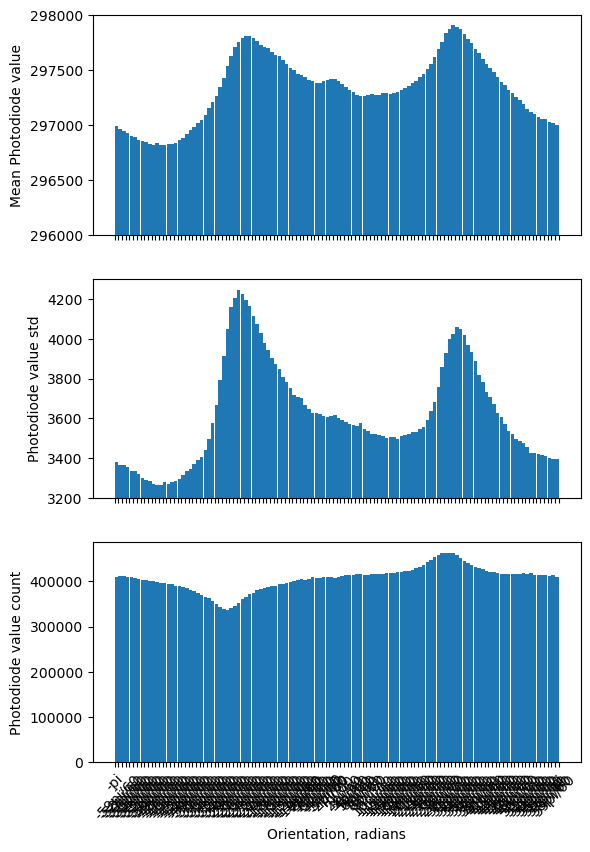

In [26]:
fig,axs = plt.subplots(nrows=3,sharex=True,figsize=(6.3,9.7))
quick_plot(fig,axs,theta_hist_12hz,"Photodiode")
#custom
axs[2].set_xlabel("Orientation, radians")
num_ticks = len(theta_hist_12hz.bin_coords[0])
tick_labels = ["-pi"] + \
    ["-{}pi/{}".format(n,num_ticks//2) if n>1 else "-pi/{}".format(num_ticks//2) for n in np.arange(1,num_ticks//2)][::-1] + \
        (["0"] if num_ticks%2 == 1 else []) +\
            ["{}pi/{}".format(n,num_ticks//2) if n>1 else "pi/{}".format(num_ticks//2) for n in np.arange(1,num_ticks//2)] + \
                ["pi"]
axs[2].set_xticklabels(tick_labels,rotation=45) ;

Text(0.5, 0, 'Acceleration')

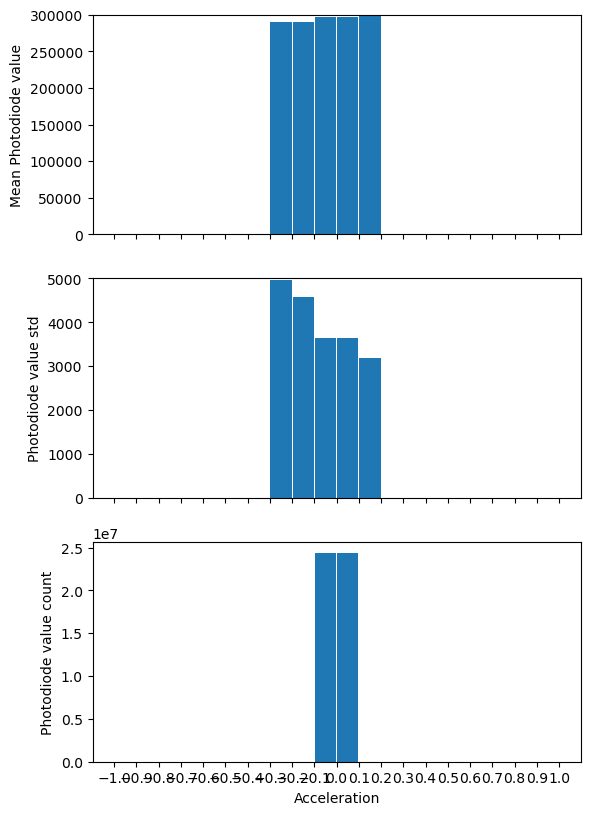

In [27]:
fig,axs = plt.subplots(nrows=3,sharex=True,figsize=(6.3,9.7))
quick_plot(fig,axs,accel_hist_12hz,"Photodiode")
#custom
axs[2].set_xlabel("Acceleration")

Text(0.5, 0, 'Layer')

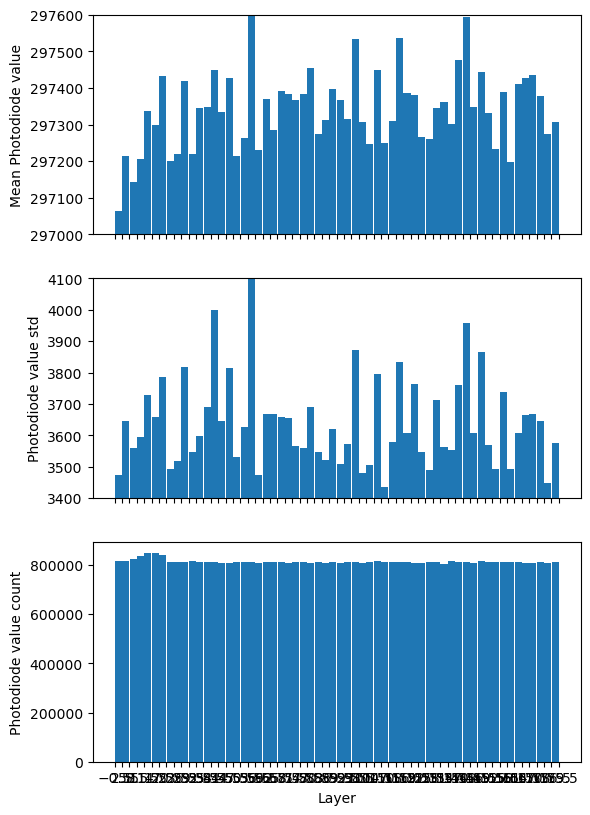

In [28]:
fig,axs = plt.subplots(nrows=3,sharex=True,figsize=(6.3,9.7))
quick_plot(fig,axs,z_hist_12hz,"Photodiode")
#custom
axs[2].set_xlabel("Layer")

Now do the other part of the dataset. Note that there is a possible error here, so we process the first 180 layers then the next 180 separately. 

In [29]:
XY_hist_30hz = Histogram.with_smart_binning(["X","Y"],list(sig_labels),test,(4,4),5,"P")
z_hist_30hz = Histogram(["Layer"],list(sig_labels),
                   np.arange(0,181,3)-0.5,
                   aux_variable="P")
theta_hist_30hz = Histogram(["Orientation"],list(sig_labels),
                       np.linspace(-np.pi,np.pi,121,endpoint=True),
                       aux_variable="P")
# Don't bother with acceleration data. 

In [30]:
dir_ = "onderive_data_2/30Hz/"

In [31]:
download_thread = threading.Thread(target=downloader,daemon=False,args=(dir_,179))
process_thread  = threading.Thread(target=processer,daemon=False,args=(XY_hist_30hz,z_hist_30hz,theta_hist_30hz))
download_thread.start()
process_thread.start()
process_thread.join()
# Block until all tasks are done
process_thread.join()
download_thread.join()

Downloader running.
Processor running.

Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing comp

In [32]:
XY_hist_30hz.pickle(suffix="30hz")
z_hist_30hz.pickle(suffix="30hz")
theta_hist_30hz.pickle(suffix="30hz")

Final section of build

In [33]:
XY_hist_22hz = Histogram.with_smart_binning(["X","Y"],list(sig_labels),test,(4,4),5,"P")
z_hist_22hz = Histogram(["Layer"],list(sig_labels),
                   np.arange(0,181,3)-0.5,
                   aux_variable="P")
theta_hist_22hz = Histogram(["Orientation"],list(sig_labels),
                       np.linspace(-np.pi,np.pi,121,endpoint=True),
                       aux_variable="P")
# Don't bother with acceleration data. 

In [34]:
dir_ = "onderive_data_2/30Hz/"

In [35]:
download_thread = threading.Thread(target=downloader,daemon=False,args=(dir_,np.inf,180))
process_thread  = threading.Thread(target=processer,daemon=False,args=(XY_hist_22hz,z_hist_22hz,theta_hist_22hz))
download_thread.start()
process_thread.start()
process_thread.join()
# Block until all tasks are done
process_thread.join()
download_thread.join()

Downloader running.
Processor running.

Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing complete.
Processing...
Processing comp

In [36]:
XY_hist_22hz.pickle(suffix="22hz")
z_hist_22hz.pickle(suffix="22hz")
theta_hist_22hz.pickle(suffix="22hz")

Plot a comparison between the three sections:

In [37]:
def quick_plot_2(fig,axs,variable,*histograms):
    means = []
    stds = []
    for i,histogram in enumerate(histograms):
        index = histogram.variable_names.index(variable)
        bin_width = (histogram.bin_coords[0][1:] - histogram.bin_coords[0][:-1]).min() * 0.95
        # Mean
        mean = np.divide(histogram.sums[index,:],histogram.counts[index,:],out=np.zeros_like(histogram.sums[index,:]),where=histogram.counts[index,:]>0)
        means.append(mean)
        axs[0][i].bar(
            0.5*(histogram.bin_coords[0][1:] + histogram.bin_coords[0][:-1]),
            mean,
            width = bin_width
        )

        # Std 
        std = np.sqrt(
            np.divide(histogram.sum2[index,:],histogram.counts[index,:],out=np.zeros_like(histogram.sum2[index,:]),where=histogram.counts[index,:]>0) -\
                mean**2)
        stds.append(std)
        axs[1][i].bar(
            0.5*(histogram.bin_coords[0][1:] + histogram.bin_coords[0][:-1]),
            std,
            width = bin_width
        )

        # Count
        axs[2][i].bar(
            0.5*(histogram.bin_coords[0][1:] + histogram.bin_coords[0][:-1]),
            histogram.counts[index,:],
            width = bin_width
        )
        # Common x-axis
        axs[2][i].set_xticks(histogram.bin_coords[0]) 
        
    # Label and rescale y-axis.
    axs[0][0].set_ylabel("Mean {} value".format(variable))
    axs[0][0].set_ylim(*calc_plot_range(*means))


    axs[1][0].set_ylabel("{} value std".format(variable))
    axs[1][0].set_ylim(*calc_plot_range(*stds))
        
    axs[2][0].set_ylabel("{} value count".format(variable))

[Text(-3.141592653589793, 0, '-180'),
 Text(-1.5707963267948966, 0, '-90'),
 Text(0.0, 0, '0'),
 Text(1.5707963267948966, 0, '90'),
 Text(3.141592653589793, 0, '180')]

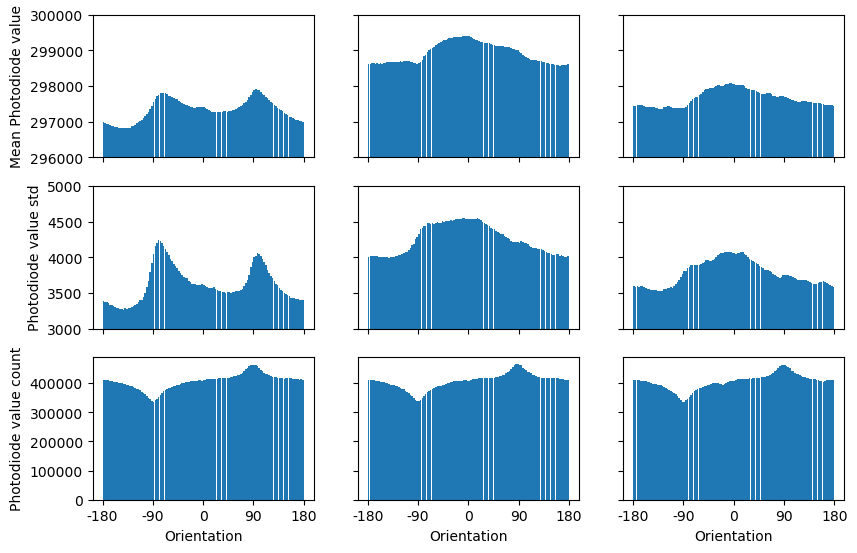

In [38]:
fig,axs = plt.subplots(nrows=3,ncols=3,sharex=True,sharey="row",figsize=(9.7,6.3))
quick_plot_2(fig,axs,"Photodiode",theta_hist_12hz,theta_hist_22hz,theta_hist_30hz)
#custom
for i in range(3):
    axs[2][i].set_xlabel("Orientation")
axs[2][0].set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
axs[2][0].set_xticklabels([-180,-90,0,90,180])

[Text(-3.141592653589793, 0, '-180'),
 Text(-1.5707963267948966, 0, '-90'),
 Text(0.0, 0, '0'),
 Text(1.5707963267948966, 0, '90'),
 Text(3.141592653589793, 0, '180')]

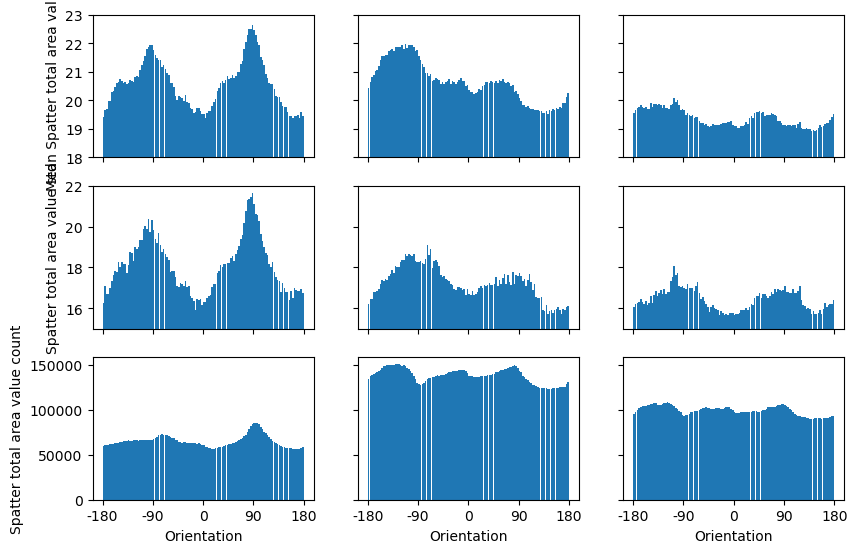

In [39]:
fig,axs = plt.subplots(nrows=3,ncols=3,sharex=True,sharey="row",figsize=(9.7,6.3))
quick_plot_2(fig,axs,"Spatter total area",theta_hist_12hz,theta_hist_22hz,theta_hist_30hz)
#custom
for i in range(3):
    axs[2][i].set_xlabel("Orientation")
axs[2][0].set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
axs[2][0].set_xticklabels([-180,-90,0,90,180])

2D plots in XY plane

In [90]:
def calc_colour_range(*data_vals,non_zero=True):
    min_ = np.inf
    max_ = -np.inf
    for values in data_vals:
        new_min = np.ma.masked_equal(values,0.0,copy=True).min() if non_zero else values.min()
        new_max = values.max()
        max_ = new_max if new_max > max_ else max_
        min_ = new_min if new_min < min_ else min_
    return min_,max_

In [91]:
def quick_plot_2d(fig,axs,variable,*histograms):
    means = []
    stds = []
    counts = []
    for i,histogram in enumerate(histograms):
        index = histogram.variable_names.index(variable)
        # Mean
        mean = np.divide(histogram.sums[index,:],histogram.counts[index,:],out=np.zeros_like(histogram.sums[index,:]),where=histogram.counts[index,:]>0)
        means.append(mean)

        # Std 
        std = np.sqrt(
            np.divide(histogram.sum2[index,:],histogram.counts[index,:],out=np.zeros_like(histogram.sum2[index,:]),where=histogram.counts[index,:]>0) -\
                mean**2)
        stds.append(std)
        
        # Count
        counts.append(histogram.counts[index,:])
        
    # Calculate colour ranges
    std_min,std_max = calc_colour_range(*stds,non_zero=True)
    mean_min,mean_max = calc_colour_range(*means,non_zero=True)
    count_min,count_max = calc_colour_range(*counts,non_zero=True)

    # Repeat loop
    for i,histogram in enumerate(histograms):
        # Mean
        mean = means[i]
        axs[0][i].imshow(mean.reshape(len(histogram.bin_coords[0])-1,len(histogram.bin_coords[1])-1),
                         cmap="afmhot_r",
                         norm=LogNorm(mean_min,mean_max,clip=True),
                         interpolation='none',
                         origin='lower')

        # Std 
        std = stds[i]
        axs[1][i].imshow(std.reshape(len(histogram.bin_coords[0])-1,len(histogram.bin_coords[1])-1),
                         cmap="afmhot_r",
                         norm=LogNorm(std_min,std_max,clip=True),
                         interpolation='none',
                         origin='lower')

        # Count
        axs[2][i].imshow(histogram.counts[index,:].reshape(len(histogram.bin_coords[0])-1,len(histogram.bin_coords[1])-1),
                         cmap="afmhot_r",
                         norm=LogNorm(count_min,count_max,clip=True),
                         interpolation='none',
                         origin='lower')
        # Common axes
        # axs[2][i].set_xticks(histogram.bin_coords[0]) 
        # axs[2][i].set_yticks(histogram.bin_coords[1])
    
    return stds,means,counts

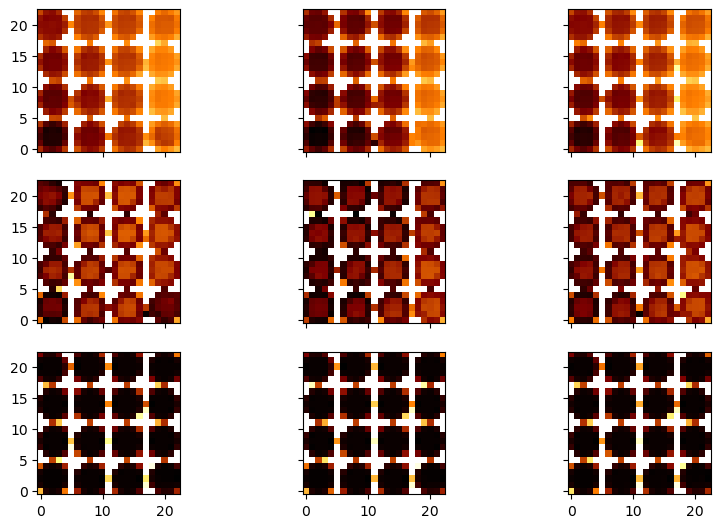

In [92]:
fig,axs = plt.subplots(nrows=3,ncols=3,sharex=True,sharey="row",figsize=(9.7,6.3))
stds,means,counts = quick_plot_2d(fig,axs,"Photodiode",XY_hist_12hz,XY_hist_22hz,XY_hist_30hz)
fig.colorbar()